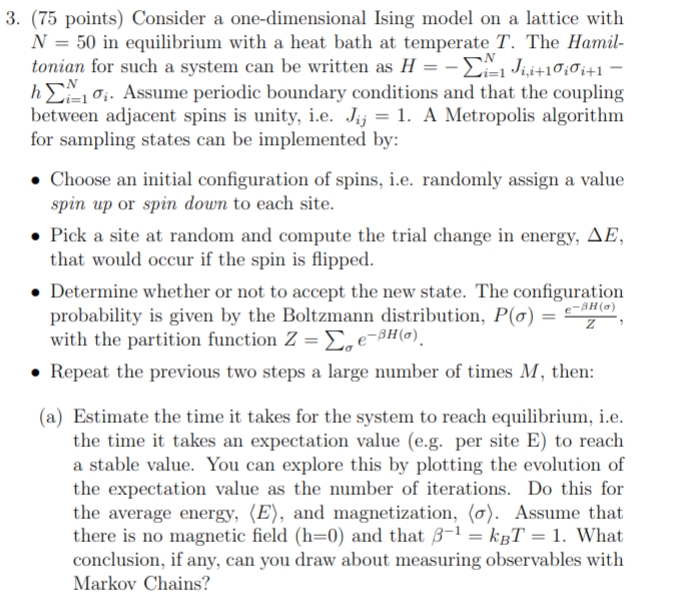

In [92]:
import numpy as np
import matplotlib.pyplot as plt
#Instead of random seed, I just copy pasted the plots for the code that takes a long time to run (1hr oof)
#The code written is for shorter run time so you know I wrote it! 

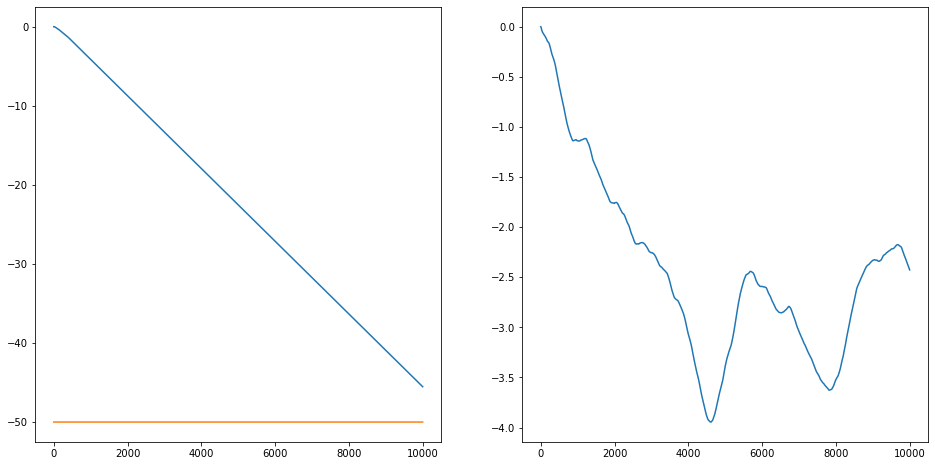

In [98]:
def H(lat,J=1,h=0):
    #J=1
    #sigma = spins, indices refer to spin in array
    return sum([-J*lat[(i-1)]*lat[i] - h*lat[i] for i in range(0,len(lat))])

def update_lattice(L,beta,acc_count,h=0):
    n_atoms=len(L)
    bit = np.random.randint(0,n_atoms)
    r = np.random.random() #random number to test against boltzmann dist.
    
    #calculate orignal lattice energy
    E_curr = H(L,h=h)
    #flip a bit and calc Energy
    L[bit] = L[bit]*-1
    E_flip = H(L,h=h)
    
    dE = E_flip - E_curr #if flip E is bigger dE is positive, we want to reject those, Final-Initial

    if dE<0 or r < np.minimum(1,np.exp(-dE*beta)): #exp is P(flip)/P(current)
        return acc_count+1
    
    else:
        L[bit]=L[bit]*-1 #reject
        return acc_count+0

#PART A
def run_alg(L, iterations, beta,h=0):
    #initializations
    mag = np.zeros(iterations)
    avg_mag = np.zeros(iterations)
    energy = np.zeros(iterations)
    avg_energy = np.zeros(iterations)
    acc_count = 0
    c=0
    for i in range(iterations):
        #calculations on current lattice
        energy[i] = H(lattice)
        mag[i] = np.sum(lattice)
        avg_energy[i] = np.mean(energy)
        avg_mag[i] = np.mean(mag)

        #update lattice
        acc_count = update_lattice(L,beta,acc_count,h)
        #print(acc_count)
        if H(L) == -50:
            if c==0:
                print(i)
                c+=1
    
    C = beta**2 * (np.mean(energy**2)-np.mean(energy)**2)
    E_site = np.mean(energy)/N
    mag_site = np.mean(mag)/N
    mag_sus = beta**2 * (np.mean(mag**2)-np.mean(mag)**2)
    return (avg_energy,avg_mag), (E_site,mag_site), (C,mag_sus), acc_count/iterations



N=50 #atoms
lattice = 2*np.random.randint(2,size=(1,N))[0]-1   #1 for up,-1 for down

runs = 10**4
beta = 10
exp,site,traits,acc_rate = run_alg(lattice,runs,beta)


fig, axs = plt.subplots(ncols=2, figsize=(16, 8))
its = np.arange(0,runs,1)

axs[0].plot(its,exp[0])
axs[0].plot(its,(np.zeros(runs)+H(np.array([1]*N))))

axs[1].plot(its,exp[1])


PART A  
Average energy will never quite reach -50 but will converge on it depending on beta ie. the temperature.

For high temperature it doesnt even come close to converging, but for low beta it converges fairly quickly.

The number of iterations needed before reached equillibrium (all the same spin) for a 
low temperature (beta=10) is 4918: So the time it took is (average time it takes for a spin to flip) * (4918) I think I found a paper and it is on the order of picoseconds for the time to flip: http://orensteinlab.berkeley.edu/wp-content/uploads/2015/01/PUB97Kantner.pdf  
Markov Chains can be very useful for simulating probabilistic phenomena where your current state only depends on the previous state you were in. 

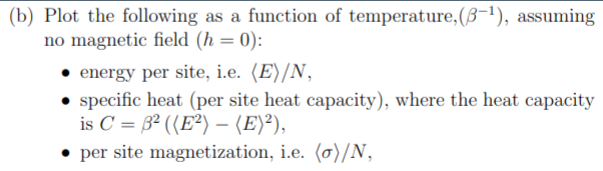
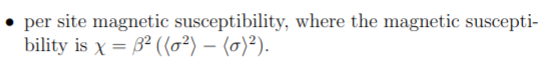

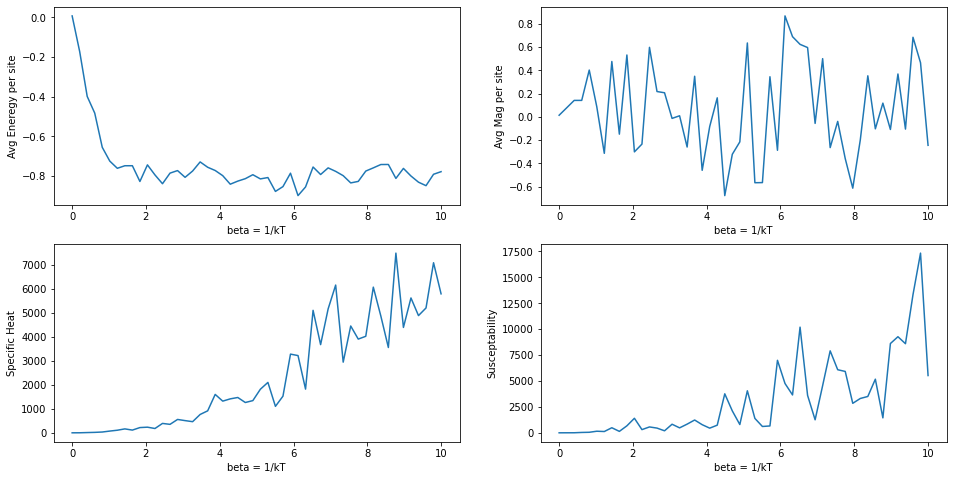

In [79]:
#PART B
betas = np.linspace(0,10, 50)

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(16, 8))

N_its = 10**3
its = np.arange(0,N_its,1)

E_sites = np.zeros_like(betas)
M_sites = np.zeros_like(betas)
E_trait = np.zeros_like(betas)
M_trait = np.zeros_like(betas)
for i in range(len(betas)):
    lattice = 2*np.random.randint(2,size=(1,N))[0]-1   #1 for up,-1 for down

    _, site, trait,acc_rate = run_alg(lattice, N_its, betas[i])
    E_sites[i] = site[0]
    M_sites[i] = site[1]
    E_trait[i] = trait[0]
    M_trait[i] = trait[1]
    
axs[0,0].set_ylabel('Avg Eneregy per site')
axs[0,1].set_ylabel('Avg Mag per site')
axs[1,0].set_ylabel('Specific Heat')
axs[1,1].set_ylabel('Susceptability')

axs[0,0].set_xlabel('beta = 1/kT')
axs[0,1].set_xlabel('beta = 1/kT')
axs[1,0].set_xlabel('beta = 1/kT')
axs[1,1].set_xlabel('beta = 1/kT')

axs[0,0].plot(betas,E_sites)
axs[0,1].plot(betas,M_sites)
axs[1,0].plot(betas,E_trait)
axs[1,1].plot(betas,M_trait)



**SAVED PLOT THAT TOOK AN HOUR TO RUN**
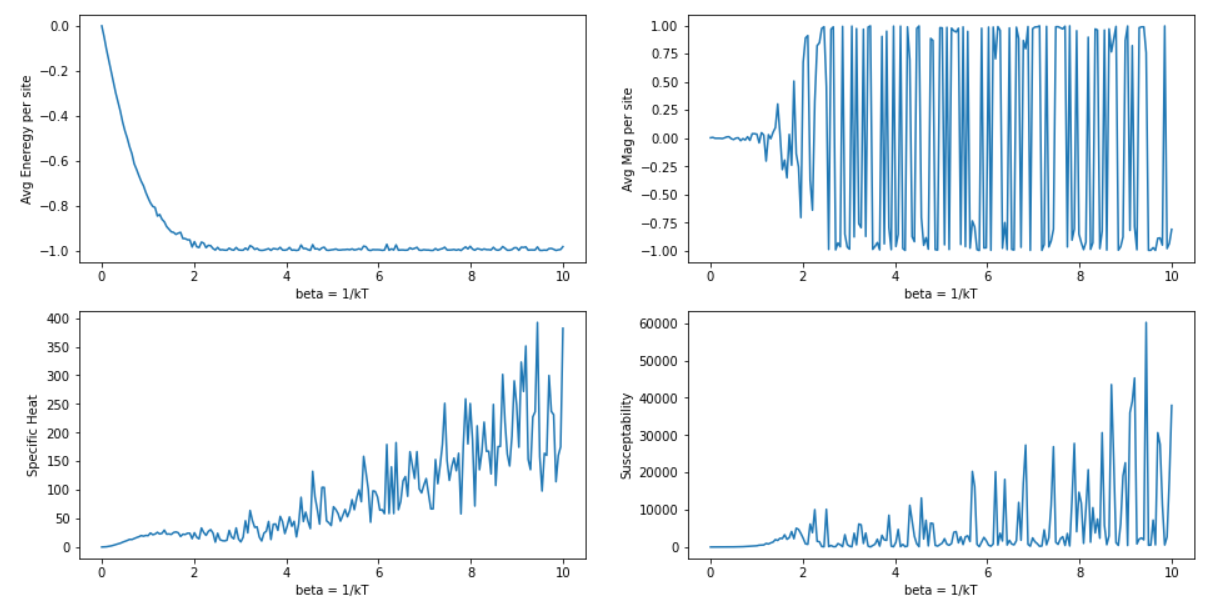

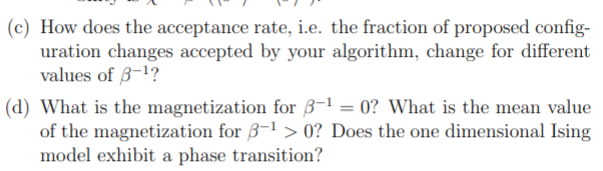

PART C  
Using part A's code I fiddled with the acceptence rates for different betas  
For large betas = **low T**, the acceptance rate is **low**  
this is because it is less likely to take an unfavorable energy configuration  
For small beta = **large T**, the acceptance rate is **high**  
this is because it is more likely to accept an unfavorable energy configuration  

  
PART D  
-if beta = 0 or T = infinity then r will always be less than 1  
That means it will always accept the random bit flip therefore you will just have a random distrobution of spin up and spin down which means the average will be 0.  
-The mean magnitzation for beta>0 will on average be -1 or 1, beta bigger than 1 means very cold and it will reach the equillibrium state of all having the same spin. However, for beta<2 it will be on average 0 since the thermal fluctuations are still high.  
-No it does not exhibit a phase transition the magnitzations stay in an ordered state and never transition from an ordered state to a disordered one. In our model this means the spins stay "locked." If beta=infinity or T=0 appearently it experiences a phase transition but T can never be 0 so it is irrelevant to reality.

Text(0, 0.5, 'Magnetization per site')

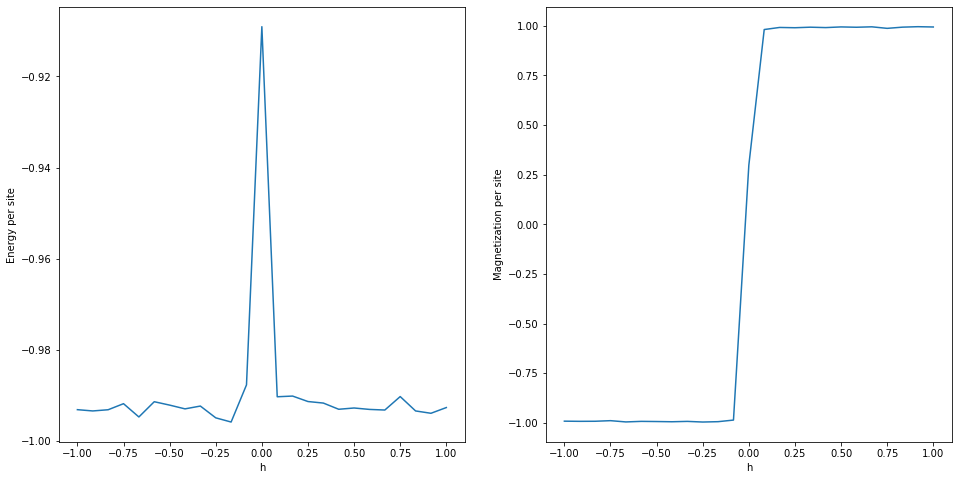

In [90]:
#part E
#turn on field and see what happens to the 
#Now let’s turn on a magnetic field. Compute the energy and
#magnetization per site for a magnetic field with strength h =
#0.1, 0.5, 1.0. Do your results depend on the direction of the field,
#i.e. the sign of h?

N=50 #atoms

runs = 10**4
beta = 10

fig, axs = plt.subplots(ncols=2, figsize=(16, 8))

hs = np.linspace(-1,1,25)
energy_sites = np.zeros_like(hs)
mag_sites = np.zeros_like(hs)

for i in range(len(hs)):
    lattice = 2*np.random.randint(2,size=(1,N))[0]-1   #1 for up,-1 for down
    exp,site,traits,acc_rate = run_alg(lattice,runs,beta,hs[i])
    energy_sites[i] = site[0]
    mag_sites[i] = site[1]
    

axs[0].plot(hs,energy_sites)
axs[1].plot(hs,mag_sites)

axs[0].set_xlabel('h')
axs[0].set_ylabel('Energy per site')
axs[1].set_xlabel('h')
axs[1].set_ylabel('Magnetization per site')

**SAVED GRAPHS FOR INTERPRETATION**  
beta=1 or high-ish energy
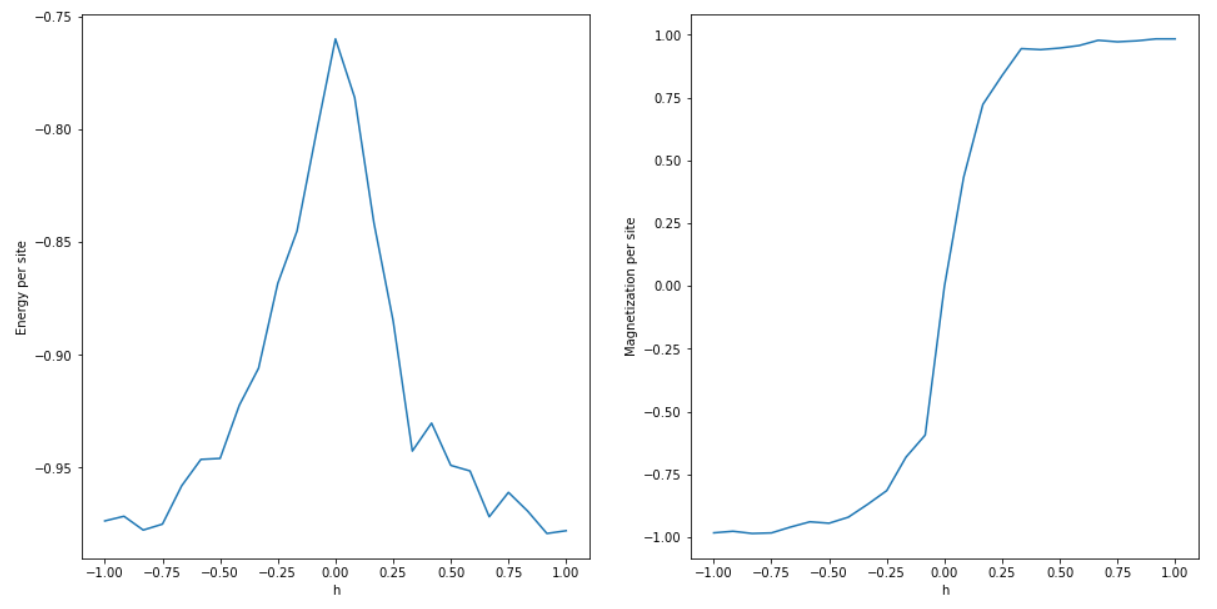

beta = 10 low energy
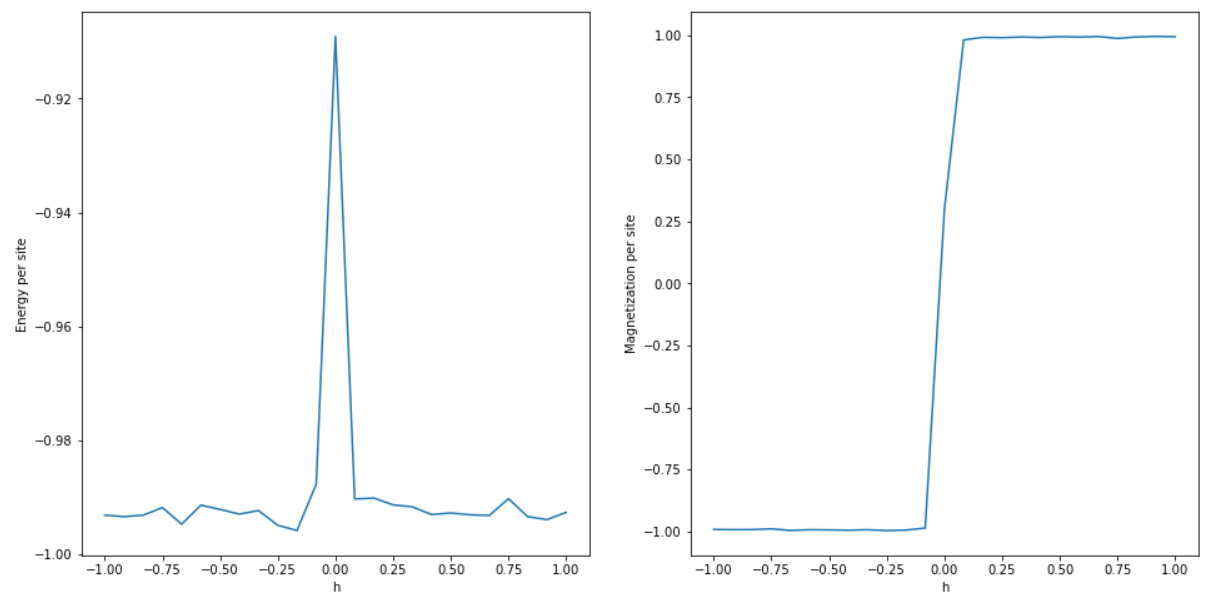


It looks like the magnetic field forces the avg energy per site to reach equillibrium faster (-1).
While beta causes equillibrium faster, notice the size of the axis for energy per site still very close to -1. And obviously not as close to -1 for the high energy since there are more fluctuations.  

For the average magnetization per site it tends to align itself with the direction of the magnetic field. And has a sharper jump around 0 depending on low or high temperature.